In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#loading the data set
a= pd.read_csv('C:\\Users\\Vivek\\Desktop\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv')
a.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [86]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
a['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [2]:
#converting categorical variables into numerical ones
a['Lead Profile'] = a['Lead Profile'].map({
    'Potential Lead': 1, 
    'Other Leads': 1, 
    'Student of SomeSchool': 1, 
    'Lateral Student': 1, 
    'Dual Specialization student': 1, 
    'Select': 0
})
a['Do Not Email'] = a['Do Not Email'].map({
    'Yes': 1,  
    'No': 0
})
a['Do Not Call'] = a['Do Not Call'].map({
    'Yes': 1,  
    'No': 0
})

a.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,No,0.0,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,No,0.0,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,No,1.0,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,No,0.0,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,No,0.0,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
a.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
a=a[~np.isnan(a['Lead Profile'])]
a.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       130
Total Time Spent on Website                         0
Page Views Per Visit                              130
Last Activity                                     103
Country                                          1602
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

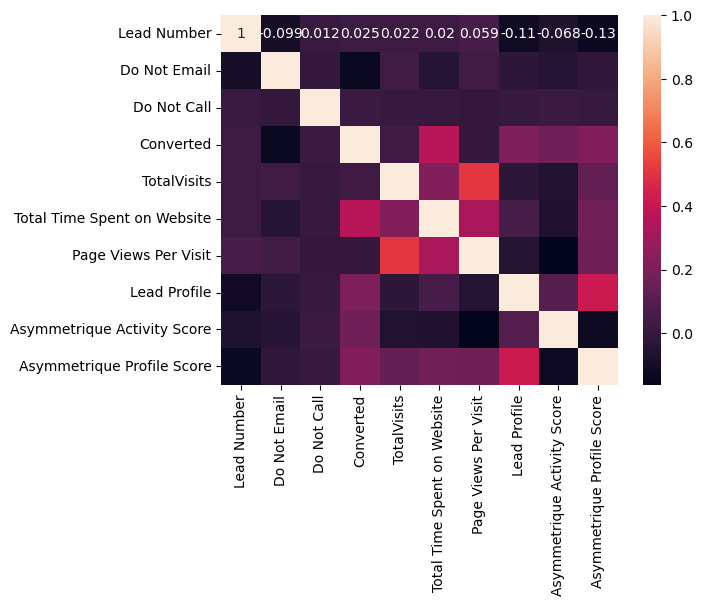

In [88]:
# graphical heat map representation of the numerical variables for better data visualization
numeric_data = a.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [3]:
a=a.drop(['Prospect ID', 'Lead Number','Last Activity','What matters most to you in choosing a course','Tags','Lead Quality','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity'], axis=1)
a

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,API,Olark Chat,0,0,0,0.0,0,0.00,NaN,Select,...,No,No,No,No,0.0,Select,02.Medium,02.Medium,15.0,15.0
1,API,Organic Search,0,0,0,5.0,674,2.50,India,Select,...,No,No,No,No,0.0,Select,02.Medium,02.Medium,15.0,15.0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,India,Business Administration,...,No,No,No,No,1.0,Mumbai,02.Medium,01.High,14.0,20.0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,India,Media and Advertising,...,No,No,No,No,0.0,Mumbai,02.Medium,01.High,13.0,17.0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,India,Select,...,No,No,No,No,0.0,Mumbai,02.Medium,01.High,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Saudi Arabia,IT Projects Management,...,No,No,No,No,1.0,Mumbai,02.Medium,01.High,15.0,17.0
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,India,Media and Advertising,...,No,No,No,No,1.0,Mumbai,02.Medium,01.High,14.0,19.0
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,India,Business Administration,...,No,No,No,No,1.0,Mumbai,02.Medium,01.High,13.0,20.0
9238,Landing Page Submission,Google,0,0,1,3.0,499,3.00,India,Human Resource Management,...,No,No,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0


In [4]:
# creating dummy variables for data creation
dummy1= pd.get_dummies(a[['Lead Origin','Lead Source','Country', 'Specialization', 'What is your current occupation','How did you hear about X Education']], drop_first= True)
a= pd.concat([a, dummy1], axis=1)
a

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
0,API,Olark Chat,0,0,0,0.0,0,0.00,NaN,Select,...,False,False,False,False,False,False,True,False,False,False
1,API,Organic Search,0,0,0,5.0,674,2.50,India,Select,...,False,False,False,False,False,False,True,False,False,False
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,India,Business Administration,...,False,False,False,False,False,False,True,False,False,False
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,India,Media and Advertising,...,False,False,False,False,False,False,False,False,False,True
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,India,Select,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Saudi Arabia,IT Projects Management,...,False,False,False,False,False,False,True,False,False,False
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,India,Media and Advertising,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,India,Business Administration,...,False,False,False,False,False,False,True,False,False,False
9238,Landing Page Submission,Google,0,0,1,3.0,499,3.00,India,Human Resource Management,...,False,False,False,True,False,False,False,False,False,False


In [5]:
a=a.dropna()
a

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
1,API,Organic Search,0,0,0,5.0,674,2.50,India,Select,...,False,False,False,False,False,False,True,False,False,False
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,India,Business Administration,...,False,False,False,False,False,False,True,False,False,False
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,India,Media and Advertising,...,False,False,False,False,False,False,False,False,False,True
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,India,Select,...,False,False,False,False,True,False,False,False,False,False
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,India,Supply Chain Management,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,0,0,1,5.0,210,2.50,India,Business Administration,...,False,False,False,False,False,False,True,False,False,False
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Saudi Arabia,IT Projects Management,...,False,False,False,False,False,False,True,False,False,False
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,India,Media and Advertising,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,India,Business Administration,...,False,False,False,False,False,False,True,False,False,False


In [6]:
a=a.drop(['Lead Origin','Lead Source','Country', 'Specialization', 'What is your current occupation','How did you hear about X Education','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis=1)
a

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
1,0,0,0,5.0,674,2.50,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
2,0,0,1,2.0,1532,2.00,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0,1.0,305,1.00,No,No,No,No,...,False,False,False,False,False,False,False,False,False,True
4,0,0,1,2.0,1428,1.00,No,No,No,No,...,False,False,False,False,True,False,False,False,False,False
6,0,0,1,2.0,1640,2.00,No,No,No,No,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,0,0,1,5.0,210,2.50,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
9235,1,0,1,8.0,1845,2.67,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
9236,0,0,0,2.0,238,2.00,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
9237,1,0,0,2.0,199,2.00,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False


In [7]:
a = a.replace({'yes': 1, 'Yes': 1, 'no': 0, 'No': 0})
a = a.replace({False: 0, True: 1})
a

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
1,0,0,0,5.0,674,2.50,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,2.0,1532,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1.0,305,1.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,2.0,1428,1.00,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,1,2.0,1640,2.00,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,0,0,1,5.0,210,2.50,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9235,1,0,1,8.0,1845,2.67,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9236,0,0,0,2.0,238,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,2.0,199,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [83]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2719 entries, 1 to 9239
Columns: 110 entries, Do Not Email to How did you hear about X Education_Word Of Mouth
dtypes: float64(5), int64(105)
memory usage: 2.3 MB


In [8]:
# creating logistic regression model 
from sklearn.preprocessing import StandardScaler
y=a['Converted']
X= a.drop(['Converted'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size= 0.70, random_state=100)
scaler= StandardScaler()
X_train[['Total Time Spent on Website']]= scaler.fit_transform( X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth
7959,0,0,6.0,0.152276,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
37,0,0,5.0,-0.205325,5.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1905,0,0,5.0,0.428604,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1828,0,0,8.0,-0.725471,4.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1840,0,0,2.0,1.176314,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [95]:
conversionrate= (sum(a['Converted'])/len(a['Converted'].index))*100
conversionrate

45.01655020228025

In [9]:
logm1= sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
logm1.fit().summary()

C:\Users\Vivek\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Vivek\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Vivek\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 1903
Model:                            GLM   Df Residuals:                     1826
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Sep 2024   Deviance:                       41078.
Time:                        22:07:24   Pearson chi2:                 2.01e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -2.064e+15   4.84e+07  -4.26e+07      0.000   -2.06e+15   -2.06e+15
Do Not Email                                             -3.561e+14   6.45e+06  -5.52e+07      0.000   -3.56e+14   -3.56e+14
Do Not Call                                               3.255e+15   6.83e+07   4.77e+07      0.000    3.26e+15    3.26e+15
TotalVisits                                               2.978e+12   4.88e+05    6.1e+06      0.000    2.98e+12    2.98e+12
Total Time Spent on Website                               6.767e+14   1.64e+06   4.14e+08      0.000    6.77e+14    6.77e+14
Page Views Per Visit                                     -2.803e+13   9.95e+05  -2.82e+07      0.000    -2.8e+13    -2.8e+13
Search                                                   -3.639e+15   5.54e+07  -6.57e+07      0.000   -3.64e+15   -3.64e+15
Magazine                                                    -4.1307   7.79e-07   -5.3e+06      0.000      -4.131      -4.131
Newspaper Article                                         4.193e+15   6.77e+07    6.2e+07      0.000    4.19e+15    4.19e+15
X Education Forums                                         -22.9926   2.69e-07  -8.54e+07      0.000     -22.993     -22.993
Newspaper                                                   40.9710   1.28e-06   3.19e+07      0.000      40.971      40.971
Digital Advertisement                                     1.517e+14   6.75e+07   2.25e+06      0.000    1.52e+14    1.52e+14
Through Recommendations                                   3.842e+15   5.53e+07   6.94e+07      0.000    3.84e+15    3.84e+15
Receive More Updates About Our Courses                       9.9077   2.14e-07   4.63e+07      0.000       9.908       9.908
Lead Profile                                             -8.258e+13   4.09e+06  -2.02e+07      0.000   -8.26e+13   -8.26e+13
Asymmetrique Activity Score                               7.279e+13   1.27e+06   5.72e+07      0.000    7.28e+13    7.28e+13
Asymmetrique Profile Score                               -2.889e+13   1.73e+06  -1.67e+07      0.000   -2.89e+13   -2.89e+13
Lead Origin_Landing Page Submission                      -8.004e+13      7e+06  -1.14e+07      0.000      -8e+13      -8e+13
Lead Origin_Lead Add Form                                 3.434e+15   6.17e+07   5.56e+07      0.000    3.43e+15    3.43e+15
Lead Origin_Lead Import                                      3.2097   1.28e-07    2.5e+07      0.000       3.210       3.210
Lead Origin_Quick Add Form                                 -10.0930   1.45e-07  -6.96e+07      0.000     -10.093     -10.093
Lead Source_Direct Traffic                               -3.665e+14   1.42e+07  -2.

In [103]:
pip install --upgrade scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.0 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/11.0 MB 8.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/11.0 MB 11.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.8/11.0 MB 15.2 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.0 MB 18.3 MB/s eta 0:00:01
   ------------------------- -------------- 7.0/11.0 MB 20.4 MB/s eta 0:00:01
   -------------------------------- ------- 8.8/11.0 MB 22.6 MB/s eta 0:00:01
   ----------------------------------- ---- 9.9/11.0 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: th

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_
col = X_train.columns[rfe_support]
print("Selected Columns:", col)

non_selected_col = X_train.columns[~rfe_support]
print("Non-selected Columns:", non_selected_col)
X_train_sm = sm.add_constant(X_train[col])  # Use selected columns only
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
print(res.summary())


Selected Columns: Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Specialization_E-Business', 'Specialization_Hospitality Management',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'How did you hear about X Education_Email'],
      dtype='object')
Non-selected Columns: Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Lead Profile',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source

In [16]:
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

7959    0.902074
37      0.857944
1905    0.533642
1828    0.226588
1840    0.734483
1994    0.417194
8479    0.444373
902     0.615270
772     0.149119
7442    0.839566
dtype: float64

In [17]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90207404, 0.85794399, 0.533642  , 0.22658808, 0.73448251,
       0.41719391, 0.44437344, 0.61527028, 0.14911891, 0.83956581])

In [19]:
y_train_pred_final= pd.DataFrame({'churn': y_train.values, 'churnprob':y_train_pred})
y_train_pred_final['customerID']= y_train.index
y_train_pred_final['predicted']= y_train_pred_final.churnprob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,churn,churnprob,customerID,predicted
0,1,0.902074,7959,1
1,1,0.857944,37,1
2,1,0.533642,1905,1
3,0,0.226588,1828,0
4,1,0.734483,1840,1


In [21]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.7845507094062008


In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
# calculating Variance inflation factor
X = X_train.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif)

C:\Users\Vivek\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\Vivek\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variables        VIF
0                                         Do Not Email   1.119828
1                                          Do Not Call   1.035043
2                                          TotalVisits   1.384391
3                          Total Time Spent on Website   1.131159
4                                 Page Views Per Visit   1.488258
..                                                 ...        ...
104             How did you hear about X Education_SMS   1.260777
105          How did you hear about X Education_Select  32.560391
106    How did you hear about X Education_Social Media   2.624109
107  How did you hear about X Education_Student of ...   6.966081
108   How did you hear about X Education_Word Of Mouth   8.065695

[109 rows x 2 columns]


KeyError: "['How did you hear about X Education_Select'] not found in axis"